In [1]:
"""Data obtained from: https://www.kaggle.com/ludobenistant/hr-analytics"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
sns.set_style('darkgrid')
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
corr = data.corr()
plt.figure(figsize=(10,7))
cmap = sns.diverging_palette(220,10,as_cmap= True)
sns.heatmap(corr, cmap=cmap)
plt.title("Correlation Plot (Heat Map)")

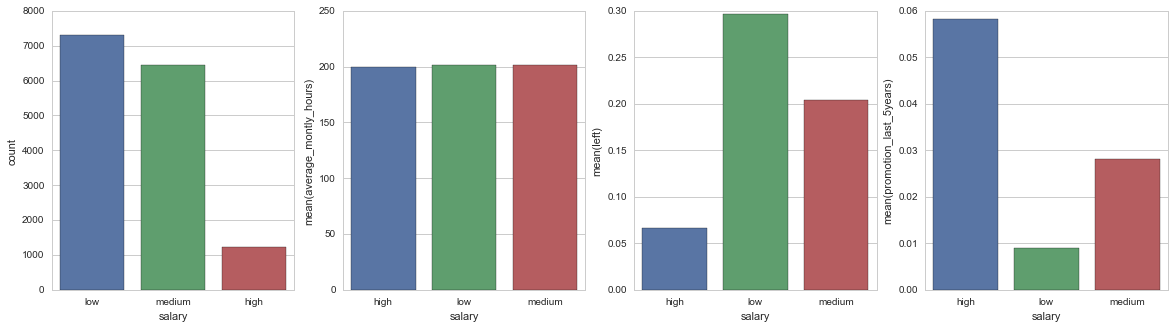

In [31]:
#Determine individual psyhometric factors based on Salary & Dept
figure, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize = (20,5))
sns.countplot(x = 'salary', data = data, ax = ax1)
hours_spent = data[["salary", "average_montly_hours"]].groupby(['salary'],as_index=False).mean()
left_company = data[['salary', 'left']].groupby(['salary'], as_index =False).mean()
promoted_last = data[['salary','promotion_last_5years']].groupby(['salary'], as_index = False).mean()
sns.barplot(x = 'salary', y = 'average_montly_hours', data = hours_spent, ax = ax2)
sns.barplot(x = 'salary', y = 'left', data = left_company, ax = ax3)
sns.barplot(x = 'salary', y = 'promotion_last_5years', data = promoted_last, ax = ax4)

In [21]:
#Lower Salaried Employees are as much as 6 times more prone to leave the company than their higher salaried counterparts
salary = data.groupby('salary').mean()
salary

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [ ]:
#Things to Ponder: What is causing promotions? Number of hours? Number of projects? Or something Else?